# Finding minimum, Hill Climbing algorithm

Corresponds to Chapter 4 of the course "Introduction to digital twin" by Romain CHASSAGNE - https://rlchassagne.github.io/

Convergence atteinte à l'itération 7


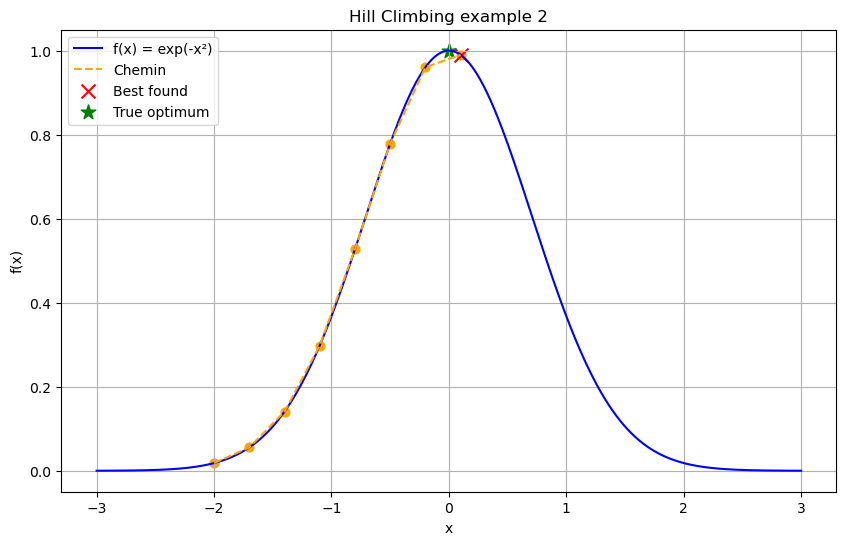

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Fonction cloche : gaussienne
def f(x):
     return np.exp(-x**2)

#Multi-bump function: sum of Gaussians
#def f(x):
#    return (
#        0.9 * np.exp(-((x - 2)**2) / 0.5) +  # bump near x = 2
#        0.7 * np.exp(-((x + 1.5)**2) / 0.3) +  # bump near x = -1.5
#        0.8 * np.exp(-((x - 0.5)**2) / 0.1)  # smaller bump near x = 0.5
#    )

def hill_climb_deterministic(step_size=0.3, start_x=-2.0, max_iterations=100):
#def hill_climb_deterministic(step_size=0.3, start_x = np.random.uniform(-3, 3), max_iterations=100):
    current_x = start_x
    current_val = f(current_x)
    history = [(current_x, current_val)]

    for i in range(max_iterations):
        left_x = current_x - step_size
        right_x = current_x + step_size
        left_val = f(left_x)
        right_val = f(right_x)

        if left_val > current_val and left_val >= right_val:
            current_x, current_val = left_x, left_val
        elif right_val > current_val and right_val >= left_val:
            current_x, current_val = right_x, right_val
        else:
            print(f"Convergence atteinte à l'itération {i}")
            break

        history.append((current_x, current_val))

    return current_x, current_val, history

# Exécution
best_x, best_val, history = hill_climb_deterministic()

# Tracé
x_vals = np.linspace(-3, 3, 400)
y_vals = f(x_vals)
history_x, history_y = zip(*history)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x) = exp(-x²)", color="blue")
#plt.plot(x_vals, y_vals, label="f(x) = exp(-(x−2)²/0.2) + exp(-(x+1.5)²/0.3) + 0.8·exp(-(x−0.5)²/0.1)", color="blue")
plt.plot(history_x, history_y, color="orange", linestyle="--", label="Chemin")
plt.scatter(history_x, history_y, color="orange", s=40)
plt.scatter([best_x], [best_val], color="red", s=100, marker="x", label="Best found")
plt.scatter([0], [1], color="green", s=120, marker="*", label="True optimum")
plt.title("Hill Climbing example 2")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()
